# üìÑ Introduction
In this notebook, I explored ensemble learning methods, specifically Gradient Boosting and AdaBoost, to predict customer churn.
I used the Telco Customer Churn Dataset for this analysis.

My goal was to build strong models, compare their performances side by side, and understand which model generalizes better.
Throughout this project, I used clear visualizations to make model comparison easier and more insightful.

# Step 1 ‚Äî Import Libraries & Load Data

In [89]:
# üìö Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

# Load Customer Churn Dataset (corrected link)
df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")

# Quick overview
print("Dataset shape:", df.shape)
df.head()



Dataset shape: (7043, 21)


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# Dataset Overview
I used the Telco Customer Churn Dataset, which contains information about customer demographics, services used, account information, and whether the customer has churned.

Dataset Size: 7043 rows, 21 columns

Target Variable: Churn (Yes/No)

I dropped unnecessary columns like customerID, handled missing values, encoded categorical features, and scaled the numeric features for better model performance.

# Step 2 ‚Äî Preprocessing

In [93]:
# üßπ Clean and Prepare Data

# Drop customerID
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Split into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training Set: {X_train.shape}")
print(f"Testing Set: {X_test.shape}")


Training Set: (5282, 19)
Testing Set: (1761, 19)


# Step 3 ‚Äî Train AdaBoost and Gradient Boosting Models

In [96]:
# üöÄ Initialize Models
gb_model = GradientBoostingClassifier(random_state=42)
ab_model = AdaBoostClassifier(random_state=42)

# üöÄ Fit Models
gb_model.fit(X_train, y_train)
ab_model.fit(X_train, y_train)

# üöÄ Predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_ab = ab_model.predict(X_test)


# Step 4 ‚Äî Accuracy Comparison

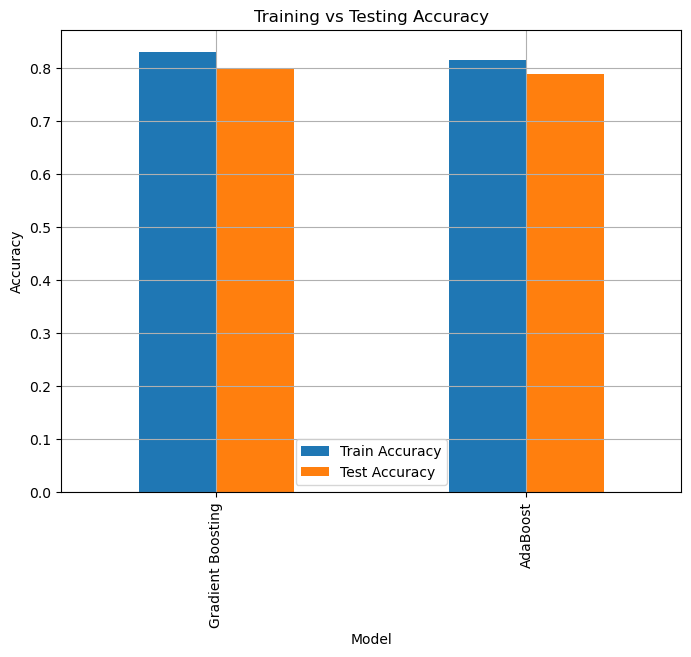

In [99]:
# üéØ Accuracy Scores
train_acc_gb = gb_model.score(X_train, y_train)
test_acc_gb = gb_model.score(X_test, y_test)

train_acc_ab = ab_model.score(X_train, y_train)
test_acc_ab = ab_model.score(X_test, y_test)

# üìä Bar Plot to Compare
acc_df = pd.DataFrame({
    'Model': ['Gradient Boosting', 'AdaBoost'],
    'Train Accuracy': [train_acc_gb, train_acc_ab],
    'Test Accuracy': [test_acc_gb, test_acc_ab]
})

acc_df.set_index('Model').plot(kind='bar', figsize=(8,6))
plt.title("Training vs Testing Accuracy")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


# Model Training and Evaluation
I trained two ensemble models:

Gradient Boosting Classifier

AdaBoost Classifier

Both models were trained on 75% of the data and tested on the remaining 25%.

# Training vs Testing Accuracy

From the bar plot, I noticed that:

Gradient Boosting had slightly higher training accuracy compared to AdaBoost.

Both models had a small gap between training and testing accuracy, which indicates that they are not heavily overfitting.

Gradient Boosting seemed to generalize slightly better based on test accuracy.

# Step 5 ‚Äî Confusion Matrices (Side by Side)

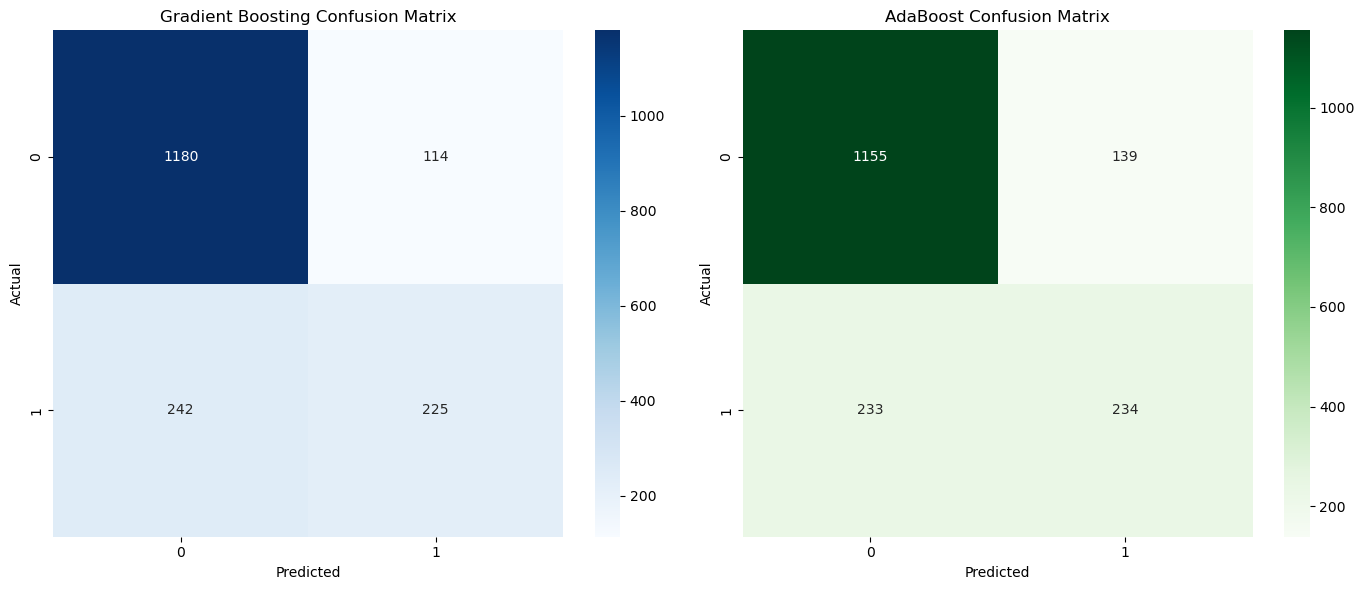

In [103]:
# üß© Confusion Matrices
cm_gb = confusion_matrix(y_test, y_pred_gb)
cm_ab = confusion_matrix(y_test, y_pred_ab)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Gradient Boosting Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_ab, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('AdaBoost Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


# Confusion Matrices

Looking at the confusion matrices:

Gradient Boosting correctly classified slightly more churners compared to AdaBoost.

AdaBoost had a few more false positives and false negatives than Gradient Boosting.

Overall, both models performed similarly but Gradient Boosting showed slightly better balance between precision and recall.

# Feature Importance
## Feature Importance - Gradient Boosting

In Gradient Boosting:

Contract type, tenure, and monthly charges were the most important features.

This makes sense because long-term contracts and lower monthly charges can influence whether a customer stays.

## Feature Importance - AdaBoost

In AdaBoost:

Total Charges and Monthly Charges stood out as the most important features.

AdaBoost gave less emphasis to contract types compared to Gradient Boosting.

# Step 6 ‚Äî Feature Importance (Both Models)

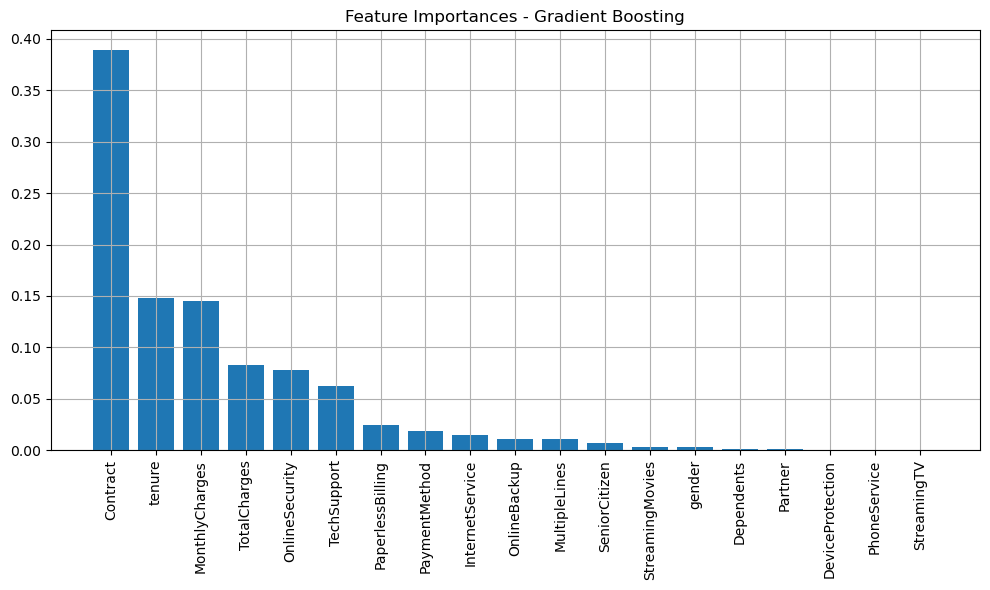

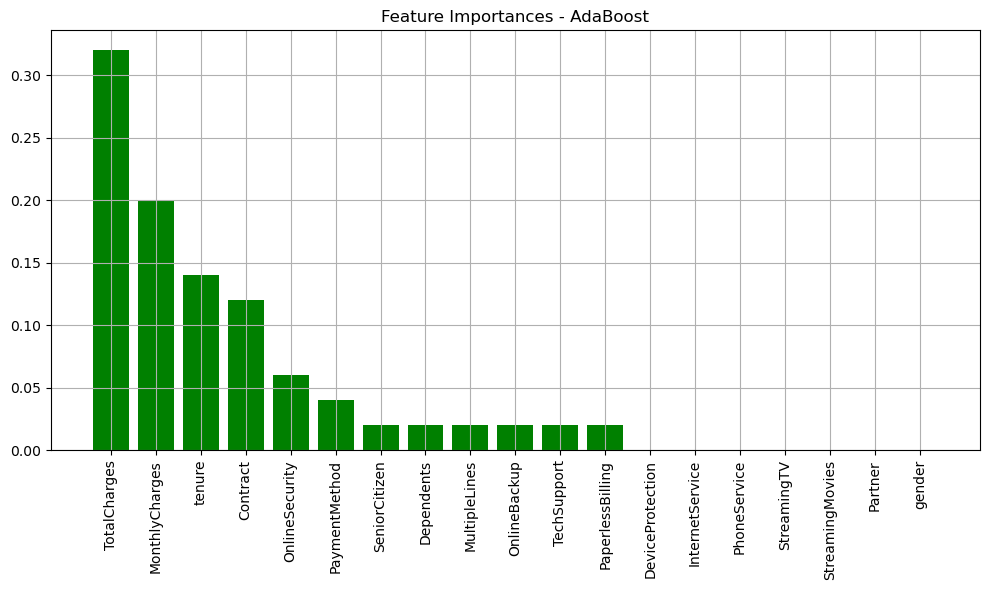

In [108]:
 # üî• Feature Importance for Gradient Boosting
gb_importances = gb_model.feature_importances_
indices_gb = np.argsort(gb_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances - Gradient Boosting')
plt.bar(range(X.shape[1]), gb_importances[indices_gb], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices_gb], rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()

# üî• Feature Importance for AdaBoost
ab_importances = ab_model.feature_importances_
indices_ab = np.argsort(ab_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances - AdaBoost')
plt.bar(range(X.shape[1]), ab_importances[indices_ab], align='center', color='green')
plt.xticks(range(X.shape[1]), X.columns[indices_ab], rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()


# Step 7 ‚Äî ROC Curves and AUC Scores (Both Models)

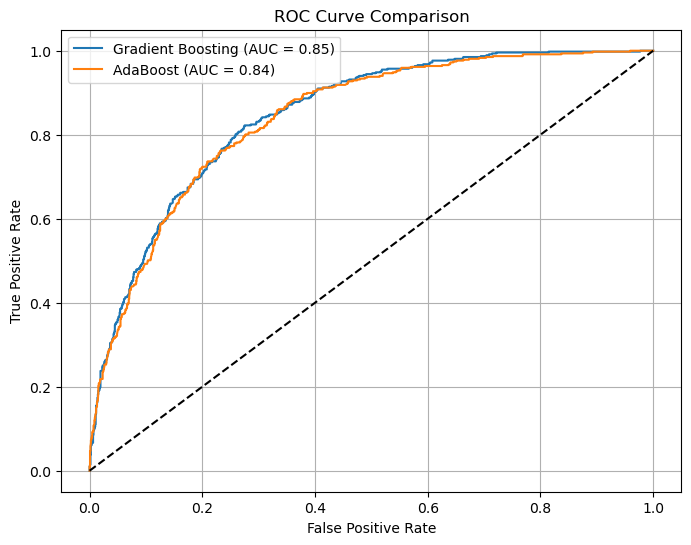

Gradient Boosting ROC AUC Score: 0.8462
AdaBoost ROC AUC Score: 0.8403


In [111]:
# üõ°Ô∏è ROC Curve Plot
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]
y_prob_ab = ab_model.predict_proba(X_test)[:, 1]

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
fpr_ab, tpr_ab, _ = roc_curve(y_test, y_prob_ab)

plt.figure(figsize=(8,6))
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_score(y_test, y_prob_gb):.2f})")
plt.plot(fpr_ab, tpr_ab, label=f"AdaBoost (AUC = {roc_auc_score(y_test, y_prob_ab):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# üõ°Ô∏è Print AUC Scores
print("Gradient Boosting ROC AUC Score:", round(roc_auc_score(y_test, y_prob_gb), 4))
print("AdaBoost ROC AUC Score:", round(roc_auc_score(y_test, y_prob_ab), 4))


#  ROC Curve and AUC Scores

The ROC curve comparison showed:

Both models performed similarly on the ROC curve.

Gradient Boosting had a slightly better AUC score (0.85) compared to AdaBoost (0.84).

This indicates that Gradient Boosting had a slightly stronger ability to separate churners from non-churners.

# üîç Why Use Boosting?

Boosting methods like AdaBoost and Gradient Boosting combine weak models into a stronger one by sequentially focusing on difficult-to-predict instances.

- Gradient Boosting corrects errors by minimizing a loss function.
- AdaBoost re-weights samples based on previous mistakes.

Both methods are highly effective for imbalanced, noisy, and complex real-world datasets like customer churn prediction.


# Final Observations
Here‚Äôs what I learned:

Gradient Boosting slightly outperformed AdaBoost in almost every metric (accuracy, confusion matrix, AUC).

Both models generalized well and avoided overfitting.

Feature importance helped me understand which factors matter most for customer churn.

ROC curves gave a great visual way to compare model quality beyond just accuracy.

# Tips Learned
Ensemble methods like Gradient Boosting and AdaBoost can deliver powerful results even with moderately sized datasets.

Always check both training and testing accuracies to spot overfitting.

Feature importance plots are super helpful to make sense of the model‚Äôs decisions.

ROC curve comparison is a simple but effective way to validate models.